Initialize

In [25]:
import time
import matplotlib.pyplot as plt
import numpy as np
import sys
import pandas as pd

Example Data dan Mengubah Limit Data

In [26]:
sys.setrecursionlimit(3000)

zombies = [100, 200, 300, 400, 500]
defense = [50, 60, 70, 80, 90]

Calculate

In [27]:
# Calculate: Damage yang diperlukan Untuk Mengalahkan Zombie
def calculate_damage(zombies, defense):
    return [z - d for z, d in zip(zombies, defense)]

Iterative

In [28]:
def iterative_damage(zombies, defense):
    total_damage = 0
    for z, d in zip(zombies, defense):
        damage = max(0, z - d)
        total_damage += damage
    return total_damage

Rekursif

In [29]:
def stack_based_recursive_damage(zombies, defense):
    stack = [(zombies, defense)]
    total_damage = 0

    while stack:
        curr_zombies, curr_defense = stack.pop()
        if not curr_zombies:
            continue
        total_damage += max(0, curr_zombies[0] - curr_defense[0])
        stack.append((curr_zombies[1:], curr_defense[1:]))

    return total_damage

Main

Iterative Time for size 100: 0.000041 seconds
Recursive Time for size 100: 0.000313 seconds
Stack-Based Recursive Time for size 100: 0.000164 seconds
Iterative Time for size 1000: 0.000265 seconds
Recursive Time for size 1000: 0.014459 seconds
Stack-Based Recursive Time for size 1000: 0.003570 seconds
Iterative Time for size 5000: 0.001414 seconds
Recursive Time for size 5000: RecursionError
Stack-Based Recursive Time for size 5000: 0.079127 seconds
Iterative Time for size 10000: 0.002670 seconds
Recursive Time for size 10000: RecursionError
Stack-Based Recursive Time for size 10000: 0.461464 seconds
Iterative Time for size 20000: 0.005177 seconds
Recursive Time for size 20000: RecursionError
Stack-Based Recursive Time for size 20000: 1.078911 seconds
|     n | Recursive Time (s)     |   Iterative Time (s) |   Stack-Based Recursive Time (s) |
|------:|:-----------------------|---------------------:|---------------------------------:|
|   100 | 0.00031256675720214844 |          4.14848e

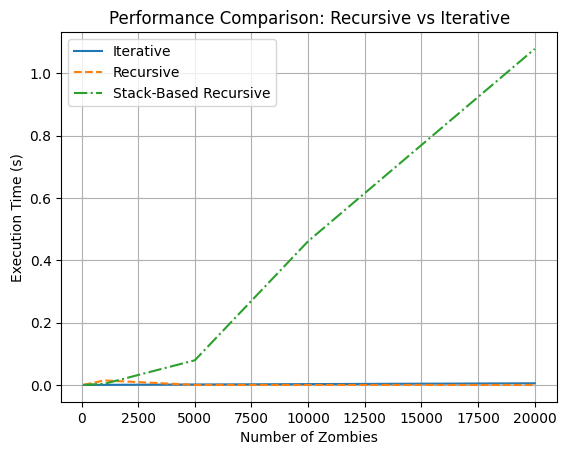

In [30]:
# Main: Compare performance and visualize
sizes = [100, 1000, 5000, 10000, 20000]
iterative_times = []
recursive_times = []
stack_recursive_times = []

for size in sizes:
    zombies = np.random.randint(100, 500, size).tolist()
    defense = np.random.randint(50, 100, size).tolist()

    # Measure iterative time
    start_time = time.time()
    iterative_damage(zombies, defense)
    iterative_time = time.time() - start_time
    iterative_times.append(iterative_time)
    print(f"Iterative Time for size {size}: {iterative_time:.6f} seconds")

    # Measure recursive time
    start_time = time.time()
    try:
        recursive_damage(zombies, defense)
        recursive_time = time.time() - start_time
        recursive_times.append(recursive_time)
        print(f"Recursive Time for size {size}: {recursive_time:.6f} seconds")
    except RecursionError:
        recursive_times.append(None)
        print(f"Recursive Time for size {size}: RecursionError")

    # Measure stack-based recursive time
    start_time = time.time()
    stack_based_recursive_damage(zombies, defense)
    stack_recursive_time = time.time() - start_time
    stack_recursive_times.append(stack_recursive_time)
    print(f"Stack-Based Recursive Time for size {size}: {stack_recursive_time:.6f} seconds")

data = {
    "n": sizes,
    "Recursive Time (s)": [t if t is not None else "RecursionError" for t in recursive_times],
    "Iterative Time (s)": iterative_times,
    "Stack-Based Recursive Time (s)": stack_recursive_times,
}
df = pd.DataFrame(data)

# Cetak tabel
print(df.to_markdown(index=False))

# Plot results
plt.plot(sizes, [t + 1e-6 for t in iterative_times], label="Iterative")
plt.plot(sizes, [(t if t is not None else 0) + 1e-6 for t in recursive_times], label="Recursive", linestyle="--")
plt.plot(sizes, [t + 1e-6 for t in stack_recursive_times], label="Stack-Based Recursive", linestyle="-.")
plt.xlabel("Number of Zombies")
plt.ylabel("Execution Time (s)")
plt.title("Performance Comparison: Recursive vs Iterative")
plt.legend()
plt.grid()
plt.show()
